Weitz - Konkrete Mathematik

# Kapitel 57: Differentialgleichungen

## Was ist eine Differentialgleichung?

https://www.youtube.com/watch?v=icvH-yoUWCQ

In [1]:
from math import exp
from plot import *

In [2]:
TU = 20
c = -0.1
d = 10

In [3]:
def Temp (T0):
    return lambda t: (T0 - TU)*exp(c*t) + TU

In [4]:
# sofortige Zuckerzugabe
f = Temp(95 - d)

In [5]:
# ohne Zucker
g1 = Temp(95)

In [6]:
g2 = Temp(g1(2) - d)

In [7]:
g = lambda t: g1(t) if t<= 2 else g2(t-2)

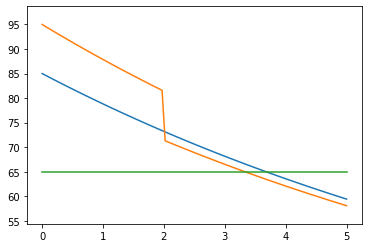

In [8]:
plotFunc2D([f, g, lambda t: 65], [0, 5], samples = 100)

## Satz von Peano

https://www.youtube.com/watch?v=c7sRSYRqeQc

In [9]:
from plot import *

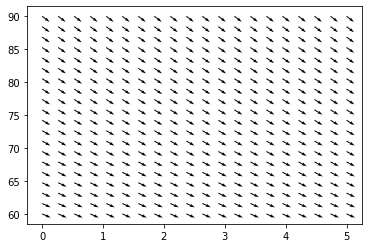

In [10]:
plotSlopeField(lambda x, y: -0.1*(y - 20), [0, 5], [60, 90])

Hier Vektorfeld, soll aber eigentlich **Richtungsfeld** sein

$$f(x, y) = 
    \begin{cases}
    0,\quad x^2 + 2y = 0 \\
    \dfrac{-2xy}{x^2 + 2y},\quad \text{sonst}
    \end{cases}
$$

DGL: $y' = f(x, y)$

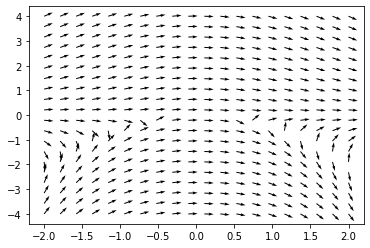

In [11]:
plotSlopeField(lambda x, y: -2*x*y/(x*x + 2*y), [-2, 2], [-4, 4])

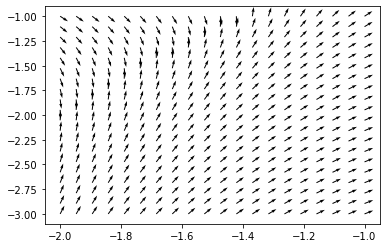

In [12]:
plotSlopeField(lambda x, y: -2*x*y/(x*x + 2*y), [-2, -1], [-3, -1], samples = 20)

/home/chris/Documents/GitHub/pythonPlayground/maths/ODE/weitz/plot.py:129: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


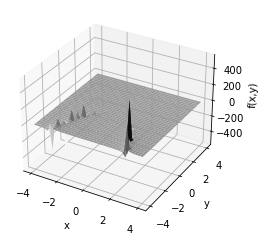

In [13]:
plotFunc3D(lambda x, y: -2*x*y/(x*x + 2*y) if (x*x + 2*y) != 0 else 0, [-4, 4])

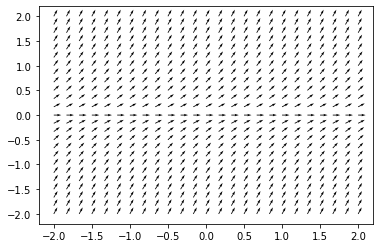

In [14]:
from math import sqrt
plotSlopeField(lambda x, y: 2*sqrt(abs(y)), [-2, 2], samples = 25)

## Symbolisches (analytisches) Lösen von Differentialgleichungen mit Computeralgebrasystemen

https://www.youtube.com/watch?v=3-9Ys1_EwwU

In [15]:
from sympy import *

In [16]:
y = Function("y")
x = symbols("x")

### Symbolische Lösung vom Kaffee-Problem

In [17]:
res = dsolve(diff(y(x), x) + (y(x) - 20)/10)
res

Eq(y(x), C1*exp(-x/10) + 20)

Die rechte Seite ist null (so auch bei `solve`)

`diff` für die Ableitung

In [18]:
print(res)

Eq(y(x), C1*exp(-x/10) + 20)


Für `SymPy` handelt es sich um ein Eq-Objekt

In [19]:
solve(res.rhs.subs(x, 0) - 95)

[75]

Hier wird die Gleichung $y(0) = 95$ nach $C_1$ aufgelöst.

`rsh`: right-hand-side (von Eq-Objekt)

Direkte Eingabe der Anfangsbedingungen in `dsolve` (*initial conditions*) beim Kaffeeproblem

In [20]:
dsolve(diff(y(x), x) + (y(x) - 20)/10, ics = {y(0): 95})

Eq(y(x), 20 + 75*exp(-x/10))

### Einmassenschwinger

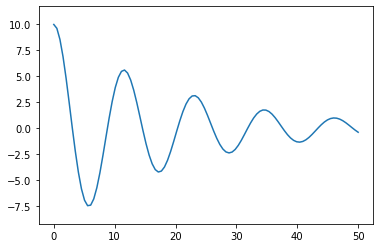

In [21]:
res = dsolve(10*diff(y(x), x, 2) + 1*diff(y(x), x) + 3*y(x))
constants = solve([res.rhs.subs(x, 0) - 10, diff(res.rhs, x).subs(x, 0)])
sol = lambdify(x, res.rhs.subs(constants))
plotFunc2D(sol, [0, 50])

In [22]:
print(res)
constants

Eq(y(x), (C1*sin(sqrt(119)*x/20) + C2*cos(sqrt(119)*x/20))/exp(x)**(1/20))


{C1: 10*sqrt(119)/119, C2: 10}

**Nun Dämpfungsfaktor $c = 12$**

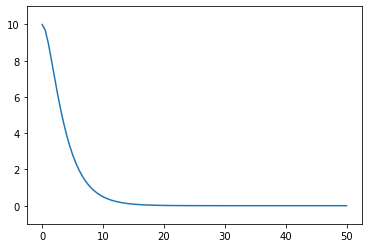

In [23]:
res = dsolve(10*diff(y(x), x, 2) + 12*diff(y(x), x) + 3*y(x))
constants = solve([res.rhs.subs(x, 0) - 10, diff(res.rhs, x).subs(x, 0)])
sol = lambdify(x, res.rhs.subs(constants))
plotFunc2D(sol, [0, 50])

## Numerisches Lösen von Differentialgleichungen

https://www.youtube.com/watch?v=_oKS1b-pc0g

### Eulerverfahren

oder auch (explizites) Eulerverfahren bzw. Eulersches Polygonzugverfahren

Bsp.: DGL $y' = -\sin(x)$, LSG $y = \cos(x)$

In [24]:
def euler (f, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x, y)]
    for i in range(n):
        x += h
        y += h*f(x, y)
        result.append((x, y))
    return result   

In [25]:
from math import sin, cos

In [26]:
P = euler(lambda x, y: -sin(x), 0, 1, 0.4, 10)
P

[(0, 1),
 (0.4, 0.8442326630765398),
 (0.8, 0.5572902267167306),
 (1.2000000000000002, 0.18447459232983998),
 (1.6, -0.2153548488867621),
 (2.0, -0.5790738196170349),
 (2.4, -0.8492590918374953),
 (2.8, -0.9832543518998573),
 (3.1999999999999997, -0.9599046945288254),
 (3.5999999999999996, -0.7828965172108846),
 (3.9999999999999996, -0.4801755190877134)]

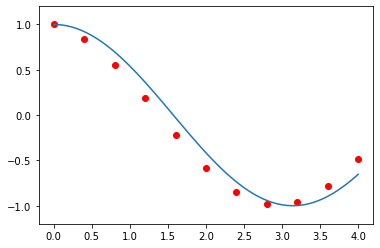

In [27]:
plotFunc2D([cos, P], [0, 4])

Problem beim Euler-Verfahren: es wird besser, wenn die Schrittweite kleiner wird, aber es wird *nur linear* besser!

D.h.: doppelte Schrittweite, LSG nur doppelt so genau

### Runge-Kutta

Idee: Zwischenpunkte einbauen, um Qualität der LSG zu verbessern

In [28]:
from scipy.integrate import odeint
from math import exp

In [29]:
f = lambda y, x: y + x*x # hier Reihenfolge getauscht! Vorgabe von `odeint`
y = lambda x: 3*exp(x) - x*x - 2*x - 2

In [30]:
X = [n/50 for n in range(51)]
X

[0.0,
 0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5,
 0.52,
 0.54,
 0.56,
 0.58,
 0.6,
 0.62,
 0.64,
 0.66,
 0.68,
 0.7,
 0.72,
 0.74,
 0.76,
 0.78,
 0.8,
 0.82,
 0.84,
 0.86,
 0.88,
 0.9,
 0.92,
 0.94,
 0.96,
 0.98,
 1.0]

In [31]:
# Anfangswert y(0) = 1
Y = odeint(f, 1, X)

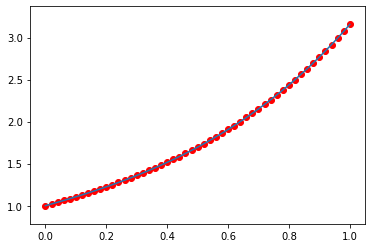

In [32]:
plotFunc2D([y, list(zip(X, Y))], [0, 1])

### Heun-Verfahren

Im Grunde ein anderes `Runge-Kutta-Verfahren`

Idee: Mittelwert der Steigungen nutzen, quadratisches Näherungsverhalten